In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
sys.path

['/home/cms-jovyan/workspace/DY_processor_with_LLPNanoAOD/sidm/DY_studies',
 '/home/cms-jovyan/workspace/DY_processor_with_LLPNanoAOD/sidm/DY_studies/../..',
 '/opt/conda/lib/python39.zip',
 '/opt/conda/lib/python3.9',
 '/opt/conda/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/lib/python3.9/site-packages']

In [2]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib.patches as patches
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

In [3]:
samples = []
bg_samples = [
    "TTJets",
]

#######################################################
SIDM_4mu_100GeV_0p25GeV_samples = [
    "4mu_100GeV_0p25GeV_0p02mm",
    "4mu_100GeV_0p25GeV_0p2mm",
    "4mu_100GeV_0p25GeV_2p0mm",
    "4mu_100GeV_0p25GeV_10p0mm",
    "4mu_100GeV_0p25GeV_20p0mm",
]
SIDM_4mu_100GeV_1p2GeV_samples = [
    "4mu_100GeV_1p2GeV_0p096mm",
    "4mu_100GeV_1p2GeV_0p96mm",
    "4mu_100GeV_1p2GeV_9p6mm",
    "4mu_100GeV_1p2GeV_48p0mm",
    "4mu_100GeV_1p2GeV_96p0mm",
]
SIDM_4mu_100GeV_5GeV_samples = [
    "4mu_100GeV_5GeV_0p4mm",
    "4mu_100GeV_5GeV_4p0mm",
    "4mu_100GeV_5GeV_40p0mm", 
    "4mu_100GeV_5GeV_200p0mm",
    "4mu_100GeV_5GeV_400p0mm",
]
#######################################################
SIDM_4mu_150GeV_0p25GeV_samples = [
    "4mu_150GeV_0p25GeV_0p013mm",
    "4mu_150GeV_0p25GeV_0p13mm",
    "4mu_150GeV_0p25GeV_1p3mm",
    "4mu_150GeV_0p25GeV_6p7mm",
    "4mu_150GeV_0p25GeV_13p0mm",
]
SIDM_4mu_150GeV_1p2GeV_samples = [
    "4mu_150GeV_1p2GeV_0p064mm",
    "4mu_150GeV_1p2GeV_0p64mm",
    "4mu_150GeV_1p2GeV_6p4mm",
    "4mu_150GeV_1p2GeV_32p0mm",
    "4mu_150GeV_1p2GeV_64p0mm",
]
SIDM_4mu_150GeV_5GeV_samples = [
    "4mu_150GeV_5GeV_0p27mm",
    "4mu_150GeV_5GeV_2p7mm",
    "4mu_150GeV_5GeV_27p0mm",
    "4mu_150GeV_5GeV_130p0mm",
    "4mu_150GeV_5GeV_270p0mm",
]
#######################################################
SIDM_4mu_200GeV_0p25GeV_samples = [
    "4mu_200GeV_0p25GeV_0p01mm",
    "4mu_200GeV_0p25GeV_0p1mm",
    "4mu_200GeV_0p25GeV_1p0mm",
    "4mu_200GeV_0p25GeV_5p0mm",
    "4mu_200GeV_0p25GeV_10p0mm",
]
SIDM_4mu_200GeV_1p2GeV_samples = [
    "4mu_200GeV_1p2GeV_0p048mm",
    "4mu_200GeV_1p2GeV_0p48mm",
    "4mu_200GeV_1p2GeV_4p8mm",
    "4mu_200GeV_1p2GeV_24p0mm",
    "4mu_200GeV_1p2GeV_48p0mm",
]
SIDM_4mu_200GeV_5GeV_samples = [
    "4mu_200GeV_5GeV_0p2mm",
    "4mu_200GeV_5GeV_2p0mm",
    "4mu_200GeV_5GeV_20p0mm",
    "4mu_200GeV_5GeV_100p0mm",
    "4mu_200GeV_5GeV_200p0mm",
]
#######################################################
SIDM_4mu_500GeV_0p25GeV_samples = [
    "4mu_500GeV_0p25GeV_0p004mm",
    "4mu_500GeV_0p25GeV_0p04mm",
    "4mu_500GeV_0p25GeV_0p4mm",
    "4mu_500GeV_0p25GeV_2p0mm",
    "4mu_500GeV_0p25GeV_4p0mm",
]
SIDM_4mu_500GeV_1p2GeV_samples = [
    "4mu_500GeV_1p2GeV_0p019mm",
    "4mu_500GeV_1p2GeV_0p19mm",
    "4mu_500GeV_1p2GeV_1p9mm",
    "4mu_500GeV_1p2GeV_9p6mm",
    "4mu_500GeV_1p2GeV_19p0mm",
]
SIDM_4mu_500GeV_5GeV_samples = [
    "4mu_500GeV_5GeV_0p08mm",
    "4mu_500GeV_5GeV_0p8mm",
    "4mu_500GeV_5GeV_8p0mm",
    "4mu_500GeV_5GeV_40p0mm",
    "4mu_500GeV_5GeV_80p0mm",
    
    #"4mu_500GeV_5GeV_800p0mm",
    #"4mu_500GeV_5GeV_8000p0mm", these are also here as long Lxy tests
]
#######################################################
SIDM_4mu_800GeV_0p25GeV_samples = [
    "4mu_800GeV_0p25GeV_0p0025mm",
    "4mu_800GeV_0p25GeV_0p025mm",
    "4mu_800GeV_0p25GeV_0p25mm",
    "4mu_800GeV_0p25GeV_1p2mm",
    "4mu_800GeV_0p25GeV_2p5mm",
]
SIDM_4mu_800GeV_1p2GeV_samples = [
    "4mu_800GeV_1p2GeV_0p012mm",
    "4mu_800GeV_1p2GeV_0p12mm",
    "4mu_800GeV_1p2GeV_1p2mm",
    "4mu_800GeV_1p2GeV_6p0mm",
    "4mu_800GeV_1p2GeV_12p0mm",
]
SIDM_4mu_800GeV_5GeV_samples = [
    "4mu_800GeV_5GeV_0p05mm",
    "4mu_800GeV_5GeV_0p5mm",
    "4mu_800GeV_5GeV_5p0mm",
    "4mu_800GeV_5GeV_25p0mm",
    "4mu_800GeV_5GeV_50p0mm",
]
#######################################################
SIDM_4mu_1000GeV_0p25GeV_samples = [ # getting keyErrors on all of these; I think they might be empty
    "4mu_1000GeV_0p25GeV_0p002mm", # Running gives "cannot unpack non-iterable NoneType object"
    "4mu_1000GeV_0p25GeV_0p02mm",
    "4mu_1000GeV_0p25GeV_0p2mm",
    "4mu_1000GeV_0p25GeV_1p0mm",
    "4mu_1000GeV_0p25GeV_2p0mm",
]
SIDM_4mu_1000GeV_1p2GeV_samples = [ # these also give keyErrors
    "4mu_1000GeV_1p2GeV_0p0096mm",
    "4mu_1000GeV_1p2GeV_0p096mm",
    "4mu_1000GeV_1p2GeV_0p96mm",
    "4mu_1000GeV_1p2GeV_4p8mm",
    "4mu_1000GeV_1p2GeV_9p6mm",
]
SIDM_4mu_1000GeV_5GeV_samples = [
    "4mu_1000GeV_5GeV_0p04mm",
    "4mu_1000GeV_5GeV_0p4mm",
    "4mu_1000GeV_5GeV_4p0mm",
    "4mu_1000GeV_5GeV_20p0mm",
    "4mu_1000GeV_5GeV_40p0mm",
]
#######################################################


SIDM_4mu_100GeV_samples = []
SIDM_4mu_100GeV_samples = SIDM_4mu_100GeV_samples + SIDM_4mu_100GeV_0p25GeV_samples + SIDM_4mu_100GeV_1p2GeV_samples + SIDM_4mu_100GeV_5GeV_samples

SIDM_4mu_150GeV_samples = []
SIDM_4mu_150GeV_samples = SIDM_4mu_150GeV_samples + SIDM_4mu_150GeV_0p25GeV_samples + SIDM_4mu_150GeV_1p2GeV_samples + SIDM_4mu_150GeV_5GeV_samples

SIDM_4mu_200GeV_samples = []
SIDM_4mu_200GeV_samples = SIDM_4mu_200GeV_samples + SIDM_4mu_200GeV_0p25GeV_samples + SIDM_4mu_200GeV_1p2GeV_samples + SIDM_4mu_200GeV_5GeV_samples

SIDM_4mu_500GeV_samples = []
SIDM_4mu_500GeV_samples = SIDM_4mu_500GeV_samples + SIDM_4mu_500GeV_0p25GeV_samples + SIDM_4mu_500GeV_1p2GeV_samples + SIDM_4mu_500GeV_5GeV_samples

SIDM_4mu_800GeV_samples = []
SIDM_4mu_800GeV_samples = SIDM_4mu_800GeV_samples + SIDM_4mu_800GeV_0p25GeV_samples + SIDM_4mu_800GeV_1p2GeV_samples + SIDM_4mu_800GeV_5GeV_samples

SIDM_4mu_1000GeV_samples = []
SIDM_4mu_1000GeV_samples = SIDM_4mu_1000GeV_samples + SIDM_4mu_1000GeV_0p25GeV_samples + SIDM_4mu_1000GeV_1p2GeV_samples + SIDM_4mu_1000GeV_5GeV_samples

samples_sublists = [
    SIDM_4mu_100GeV_0p25GeV_samples, SIDM_4mu_100GeV_1p2GeV_samples, SIDM_4mu_100GeV_5GeV_samples, 
    SIDM_4mu_150GeV_0p25GeV_samples, SIDM_4mu_150GeV_1p2GeV_samples, SIDM_4mu_150GeV_5GeV_samples,
    SIDM_4mu_200GeV_0p25GeV_samples, SIDM_4mu_200GeV_1p2GeV_samples, SIDM_4mu_200GeV_5GeV_samples, 
    SIDM_4mu_500GeV_0p25GeV_samples, SIDM_4mu_500GeV_1p2GeV_samples, SIDM_4mu_500GeV_5GeV_samples,
    SIDM_4mu_800GeV_0p25GeV_samples, SIDM_4mu_800GeV_1p2GeV_samples, SIDM_4mu_800GeV_5GeV_samples,
    #SIDM_4mu_1000GeV_0p25GeV_samples, 
    SIDM_4mu_1000GeV_1p2GeV_samples, # These two groups don't work at all
    SIDM_4mu_1000GeV_5GeV_samples,
    ]

In [4]:
samples = []
samples = samples + bg_samples
for sublist in samples_sublists:
    print(sublist[0])
    samples = samples + [sublist[0]]
print(samples)

4mu_100GeV_0p25GeV_0p02mm
4mu_100GeV_1p2GeV_0p096mm
4mu_100GeV_5GeV_0p4mm
4mu_150GeV_0p25GeV_0p013mm
4mu_150GeV_1p2GeV_0p064mm
4mu_150GeV_5GeV_0p27mm
4mu_200GeV_0p25GeV_0p01mm
4mu_200GeV_1p2GeV_0p048mm
4mu_200GeV_5GeV_0p2mm
4mu_500GeV_0p25GeV_0p004mm
4mu_500GeV_1p2GeV_0p019mm
4mu_500GeV_5GeV_0p08mm
4mu_800GeV_0p25GeV_0p0025mm
4mu_800GeV_1p2GeV_0p012mm
4mu_800GeV_5GeV_0p05mm
4mu_1000GeV_1p2GeV_0p0096mm
4mu_1000GeV_5GeV_0p04mm
['TTJets', '4mu_100GeV_0p25GeV_0p02mm', '4mu_100GeV_1p2GeV_0p096mm', '4mu_100GeV_5GeV_0p4mm', '4mu_150GeV_0p25GeV_0p013mm', '4mu_150GeV_1p2GeV_0p064mm', '4mu_150GeV_5GeV_0p27mm', '4mu_200GeV_0p25GeV_0p01mm', '4mu_200GeV_1p2GeV_0p048mm', '4mu_200GeV_5GeV_0p2mm', '4mu_500GeV_0p25GeV_0p004mm', '4mu_500GeV_1p2GeV_0p019mm', '4mu_500GeV_5GeV_0p08mm', '4mu_800GeV_0p25GeV_0p0025mm', '4mu_800GeV_1p2GeV_0p012mm', '4mu_800GeV_5GeV_0p05mm', '4mu_1000GeV_1p2GeV_0p0096mm', '4mu_1000GeV_5GeV_0p04mm']


In [5]:
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=2)

In [6]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "matchedLj", # strict cuts on lj objects
        "4mu_matchedLj",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

Not applying any cuts to the lepton jets for channel baseNoLj

In [7]:
cutflow.print_multi_table([out[samples[0]]["cutflow"]["4mu"]], [samples[0]], fraction=False, unweighted=False)


cut name        Total cuts:
                      TTJets
------------  --------------
No selection        77933.00
PV filter           77790.00
>=2 LJs              1062.00
4mu                     2.00



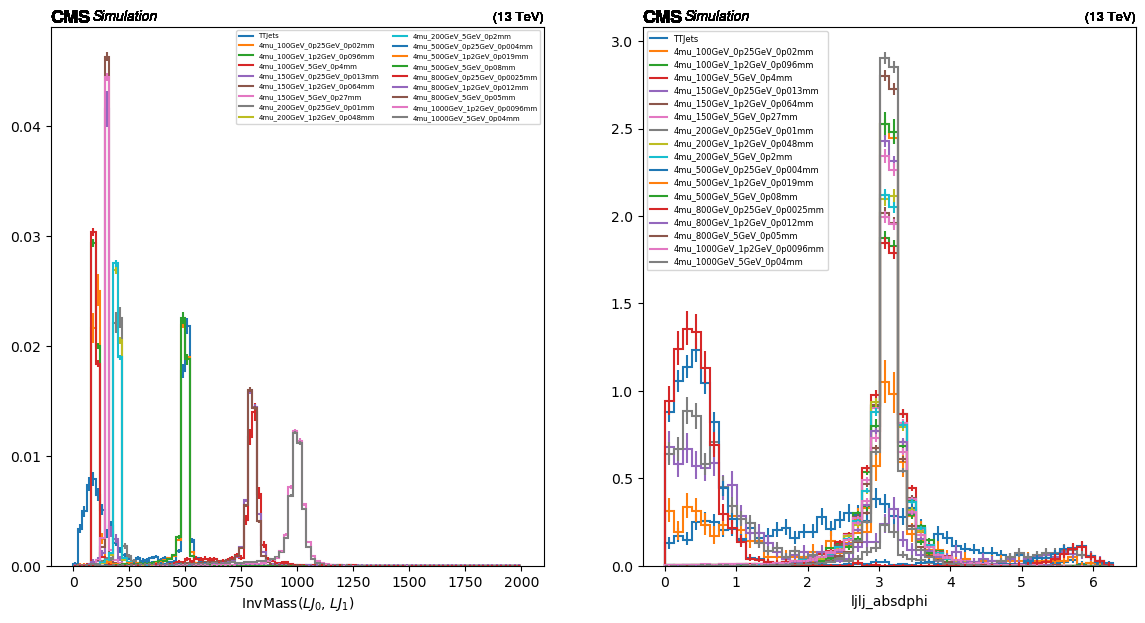

In [8]:
plt.subplots(1,2,figsize=(14,7))
plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"]["base", :], flow='none', density=True)
plt.legend(samples, loc=1, prop={'size': 5}, ncol=2)
plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["base", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})